<a href="https://colab.research.google.com/github/sahrol-azmi/gitnew/blob/main/Measles_Phg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install packages (if not already installed)
install.packages("deSolve")
install.packages("ggplot2")

# Load packages
library(deSolve)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
sir_model_pahang <- function(time, state, parameters) {
  with(as.list(c(state, parameters)), {
    N <- S + I + R # Total population at current time step

    # Differential equations
    dS_dt <- A - (beta * S * I / N) - (mu * S)
    dI_dt <- (beta * S * I / N) - (gamma * I) - (mu * I)
    dR_dt <- (gamma * I) - (mu * R)

    # Return rates of change
    return(list(c(dS_dt, dI_dt, dR_dt)))
  })
}

In [5]:
# Population and initial state values
N_pahang <- 1591295  # Pahang population from MyCensus 2020 [33]
I0 <- 1             # Initial number of infected individuals (e.g., 1 imported case)

# Assume initial vaccination coverage provides immunity to a certain percentage.
# This requires current vaccination coverage and efficacy data for Pahang.
# For example, if 90% of the population is effectively immune through vaccination:
R0_immune_initial <- N_pahang * 0.90
S0 <- N_pahang - I0 - R0_immune_initial

initial_state_values <- c(S = S0, I = I0, R = R0_immune_initial)

# Parameters (daily rates)
# Measles R0 typically 12-18.[30, 31] Let's use R0 = 15.
# Infectious period D = 9 days (infectious 4 days before to 4 days after rash [1, 3])
gamma_val <- 1/9

# Transmission rate beta = R0 * gamma (assuming N is in the equations as S*I/N)
beta_val <- 15 * gamma_val

# Births in Pahang (2023): 24,162 [38]
births_per_year_pahang <- 24162
A_daily_pahang <- births_per_year_pahang / 365

# Deaths in Pahang (2023): 10,508 [41]
deaths_per_year_pahang <- 10508
mu_daily_pahang <- (deaths_per_year_pahang / N_pahang) / 365

parameters_pahang <- c(beta = beta_val,
                       gamma = gamma_val,
                       A = A_daily_pahang,
                       mu = mu_daily_pahang)

In [17]:
# Simulate for 1 year (365 days) with daily output
times <- seq(from = 0, to = 3650, by = 1)

In [18]:
# Run the SIR model simulation
output_pahang <- deSolve::ode(y = initial_state_values,
                              times = times,
                              func = sir_model_pahang,
                              parms = parameters_pahang)

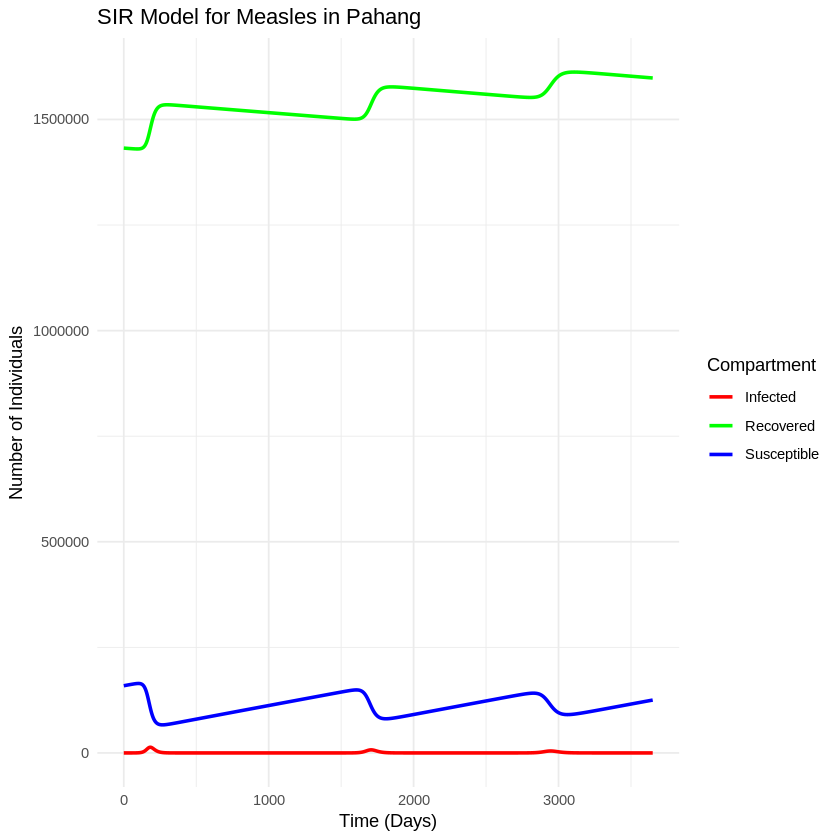

In [19]:
# Convert output to a data frame
output_df_pahang <- as.data.frame(output_pahang)

# Plotting using ggplot2
library(ggplot2)

ggplot(output_df_pahang, aes(x = time)) +
  geom_line(aes(y = S, colour = "Susceptible"), linewidth = 1) +
  geom_line(aes(y = I, colour = "Infected"), linewidth = 1) +
  geom_line(aes(y = R, colour = "Recovered"), linewidth = 1) +
  labs(title = "SIR Model for Measles in Pahang",
       x = "Time (Days)",
       y = "Number of Individuals",
       colour = "Compartment") +
  scale_colour_manual(values = c("Susceptible" = "blue",
                                 "Infected" = "red",
                                 "Recovered" = "green")) +
  theme_minimal()

In [13]:
# To track cumulative incidence, modify the model function:
sir_model_pahang_cumulative <- function(time, state, parameters) {
  with(as.list(c(state, parameters)), {
    N <- S + I + R # Total population

    new_infections <- beta * S * I / N

    dS_dt <- A - new_infections - (mu * S)
    dI_dt <- new_infections - (gamma * I) - (mu * I)
    dR_dt <- (gamma * I) - (mu * R)
    dC_dt <- new_infections # Cumulative incidence

    return(list(c(dS_dt, dI_dt, dR_dt, dC_dt)))
  })
}

# Update initial state values to include C
initial_state_values_cumulative <- c(S = S0, I = I0, R = R0_immune_initial, C = 0)

# Re-run simulation
# output_pahang_cumulative <- deSolve::ode(y = initial_state_values_cumulative,...)
# Then plot output_pahang_cumulative$C

#Simulating intervention scenario

In [20]:
# Inside the deSolve loop or as an event:
 if (time == 100) {
   susceptibles_vaccinated_sia <- S * 0.60
   S <- S - susceptibles_vaccinated_sia
   R <- R + susceptibles_vaccinated_sia
 }

ERROR: Error in time == 100: comparison (==) is possible only for atomic and list types
